In [6]:
import networkx as nx

import matching.glema.common.utils.arg_utils as arg_utils
import matching.glema.common.utils.graph_utils as graph_utils
import matching.glema.common.utils.plot_utils as plot_utils

In [7]:
args = arg_utils.parse_args( use_default=True )
args.dataset = "pmart_all"
args.directed = False
args.anchored = True
args.iso = True
args.test_data = True

In [8]:
record_scopes = graph_utils.get_record_scopes( args )
design_patterns = graph_utils.get_design_patterns( args )
label_args = {
    "record_scopes": record_scopes,
    "design_patterns": design_patterns
}

In [13]:
sources = graph_utils.load_source_graphs( args, with_loading_bar=True )

100%|██████████| 1267/1267 [00:00<00:00, 2783.62it/s]


In [14]:
sources.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [9]:
source_graph_idx = 3
query_subgraph_idx = 0

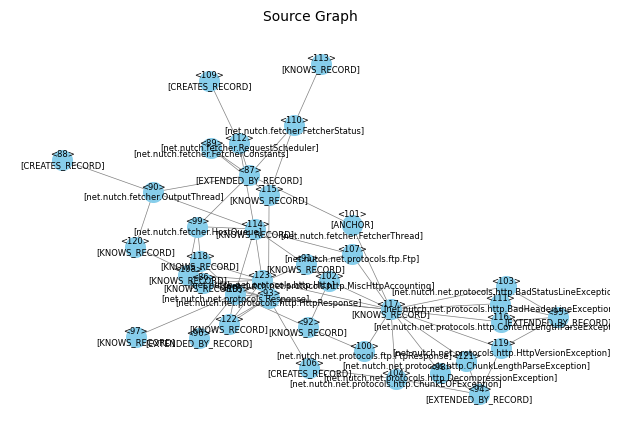

In [10]:
source = graph_utils.load_source_graph( args, source_graph_idx )
plot_utils.plot_graph( source,
                  title="Source Graph",
                  nodeLabels=graph_utils.get_node_labels( source, **label_args ) )

In [11]:
query = graph_utils.load_query_graph( args, source_graph_idx, query_subgraph_idx )
plot_utils.plot_graph( query,
                  title="Query Graph",
                  nodeLabels=graph_utils.get_node_labels( query, **label_args ) )

KeyError: 0

In [ ]:
matching_colors = {
    2: "purple",
    1: "green",
    0: "grey",
    -1: "red"
}
combined, node_colors, edge_colors = graph_utils.combine_graph( source, query,
                                                          matching_colors=matching_colors )
plot_utils.plot_graph(
    title="Combined Graph",
    graph=combined,
    nodeColors=node_colors,
    edgeColors=edge_colors,
    nodeLabels=graph_utils.get_node_labels( combined )
)

In [ ]:
args.test_data = True
args.iso = True
total_anchors_queries = 0
total_queries = 0
for source_graph_idx, source_graph in graph_utils.load_source_graphs( args ).items():
    anchors_queries_per_source = 0
    queries_per_source = 0
    for query_graph_idx, query_graph in graph_utils.load_query_graphs( args, source_graph_idx ).items():
        
        _, node_matches, _ = graph_utils.combine_graph( source_graph, query_graph )
        
        has_anchor = any( node_match == 2 for node_match in node_matches )
        if has_anchor:
            anchors_queries_per_source += 1
            total_anchors_queries += 1
        queries_per_source += 1
        total_queries += 1
    print( f"Queries with anchors found for source #{source_graph_idx}: {anchors_queries_per_source}/{queries_per_source}" )
print( f"Queries with anchors found: {total_anchors_queries}/{total_queries}" )